In [1]:
import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.utils import plot_model
from keras.utils import to_categorical

import numpy as np
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

print(keras.__version__)
print(tf.__version__)


Using TensorFlow backend.


2.2.0
1.8.0


In [2]:
from keras.datasets import cifar10

num_classes = 10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Normalize RGB to 0..1
X_train = X_train / 255
X_test = X_test / 255

# Category to one-hot encoding
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [3]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 10))

In [4]:
X_train[1], Y_train[1]

(array([[[0.60392157, 0.69411765, 0.73333333],
         [0.49411765, 0.5372549 , 0.53333333],
         [0.41176471, 0.40784314, 0.37254902],
         ...,
         [0.35686275, 0.37254902, 0.27843137],
         [0.34117647, 0.35294118, 0.27843137],
         [0.30980392, 0.31764706, 0.2745098 ]],
 
        [[0.54901961, 0.62745098, 0.6627451 ],
         [0.56862745, 0.6       , 0.60392157],
         [0.49019608, 0.49019608, 0.4627451 ],
         ...,
         [0.37647059, 0.38823529, 0.30588235],
         [0.30196078, 0.31372549, 0.24313725],
         [0.27843137, 0.28627451, 0.23921569]],
 
        [[0.54901961, 0.60784314, 0.64313725],
         [0.54509804, 0.57254902, 0.58431373],
         [0.45098039, 0.45098039, 0.43921569],
         ...,
         [0.30980392, 0.32156863, 0.25098039],
         [0.26666667, 0.2745098 , 0.21568627],
         [0.2627451 , 0.27058824, 0.21568627]],
 
        ...,
 
        [[0.68627451, 0.65490196, 0.65098039],
         [0.61176471, 0.60392157, 0.62745

Text(0.5,1,'Y=[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] -  truck')

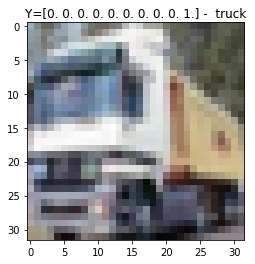

In [5]:
plt.imshow(X_train[1])
title = 'Y=' + str(Y_train[1]) + ' -  ' + classes[np.argmax(Y_train[1])]
plt.title(title)

In [6]:
# Create model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

# Save model image
plot_model(model, to_file='convolution-cifar10.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [ ]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 228s 5ms/step - loss: 1.2990 - acc: 0.5401 - val_loss: 1.2331 - val_acc: 0.5644
Epoch 2/5
50000/50000 [==============================] - 227s 5ms/step - loss: 1.2195 - acc: 0.5692 - val_loss: 1.1274 - val_acc: 0.5999
Epoch 3/5
50000/50000 [==============================] - 217s 4ms/step - loss: 1.1528 - acc: 0.5925 - val_loss: 1.0795 - val_acc: 0.6263
Epoch 4/5
 4640/50000 [=>............................] - ETA: 3:06 - loss: 1.1149 - acc: 0.6052

In [8]:
model.evaluate(X_test, Y_test, verbose=1)

10000/10000 [==============================] - 11s 1ms/step


[1.244443438911438, 0.5593]

In [9]:
predictions = model.predict(X_test)
predictions

array([[1.1219809e-02, 2.7210894e-03, 4.9147483e-02, ..., 1.8441914e-02,
        2.0725658e-02, 8.5290773e-03],
       [2.0159145e-01, 3.1738931e-01, 6.2598882e-04, ..., 2.1916752e-05,
        4.5521796e-01, 2.4879193e-02],
       [1.7091967e-01, 2.5581443e-01, 1.1907272e-02, ..., 2.9008049e-03,
        4.6888804e-01, 7.5924046e-02],
       ...,
       [1.7289518e-03, 4.5263037e-04, 5.1739670e-02, ..., 1.8028982e-01,
        6.3988910e-04, 3.4093424e-03],
       [7.5087123e-02, 4.5948696e-01, 3.7072934e-02, ..., 6.9344148e-02,
        1.1685247e-02, 6.0949024e-02],
       [4.5893337e-03, 2.0996726e-03, 2.9935775e-02, ..., 6.8550116e-01,
        6.5989635e-04, 4.3535386e-03]], dtype=float32)

In [10]:
np.argmax(predictions, axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [11]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [12]:
# serialize model to JSON
model_json = model.to_json()
with open("convolution-cifar10.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("convolution-cifar10.h5")